In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML, Image, display
from matplotlib import animation

In [2]:
# set data path
data_path = pathlib.Path(
    "../../1.scDINO_run/outputdir/apoptosis_timelapse/CLS_features/CLS_features_annotated_umap.csv"
).resolve()

output_path = pathlib.Path("../figures/gifs/").resolve()
# create output path if it doesn't exist
output_path.mkdir(parents=True, exist_ok=True)

# load in the data
CLS_features_umap = pd.read_csv(data_path, index_col=0)
CLS_features_umap.head()

,Metadata_image_path,Metadata_Well,Metadata_FOV,Metadata_Time,Metadata_ImageNumber,Metadata_Nuclei_Number_Object_Number,Metadata_original_index,Metadata_compound,Metadata_dose,Metadata_control,UMAP1,UMAP2
0,../0.pre-process_images/data/processed_images/...,C-02,1,1,1,102,111256,Staurosporine,0.0,negative,0.807102,4.956420
1,../0.pre-process_images/data/processed_images/...,C-02,1,1,1,106,111257,Staurosporine,0.0,negative,1.417984,4.481785
2,../0.pre-process_images/data/processed_images/...,C-02,1,1,1,121,111258,Staurosporine,0.0,negative,1.491850,5.010065
3,../0.pre-process_images/data/processed_images/...,C-02,1,1,1,127,111259,Staurosporine,0.0,negative,-2.599025,3.443170
4,../0.pre-process_images/data/processed_images/...,C-02,1,1,1,13,111241,Staurosporine,0.0,negative,2.953780,3.543933


In [3]:
# sort the data by time
CLS_features_umap = CLS_features_umap.sort_values(by="Metadata_Time")
unique_doses = CLS_features_umap["Metadata_dose"].unique()

In [4]:
# define an interval for the animation
# I want it to match 7 frames per second (fps)
# so I will set the interval to 1000/7
fps = 7
interval = 1000 / fps
print(f"Interval: {interval}")

Interval: 142.85714285714286


In [5]:
# this loop will create a gif for each dose
# and save it to the output path
# the gifs will be named Staurosporine_XXXnM.gif
# where XXX is the dose
for dose in unique_doses:
    fig, ax = plt.subplots(figsize=(6, 6))

    tmp_df = CLS_features_umap[CLS_features_umap["Metadata_dose"] == dose]
    classes = tmp_df["Metadata_Time"].unique()
    # split the data into n different dfs based on the classes
    dfs = [tmp_df[tmp_df["Metadata_Time"] == c] for c in classes]
    for i in range(len(dfs)):
        df = dfs[i]
        # split the data into the Metadata and the Features
        metadata_columns = df.columns[df.columns.str.contains("Metadata")]
        metadata_df = df[metadata_columns]
        features_df = df.drop(metadata_columns, axis=1)
        dfs[i] = features_df
    # plot the list of dfs and animate them
    ax.set_xlim(-7, 7)
    ax.set_ylim(-1, 7)
    scat = ax.scatter([], [], c="b", s=1)
    text = ax.text(-6, -2.5, "", ha="left", va="top")
    # add title
    ax.set_title(f"Staurosporine {dose} nM")
    # axis titles
    ax.set_xlabel("UMAP0")
    ax.set_ylabel("UMAP1")

    def animate(i):
        df = dfs[i]
        i = i * 30
        scat.set_offsets(df.values)
        text.set_text(f"{i} minutes.")
        return (scat,)

    anim = animation.FuncAnimation(
        fig, init_func=None, func=animate, frames=len(dfs), interval=interval
    )
    anim.save(f"{output_path}/Staurosporine_{dose}nM.gif", writer="imagemagick")

    plt.close(fig)

MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.


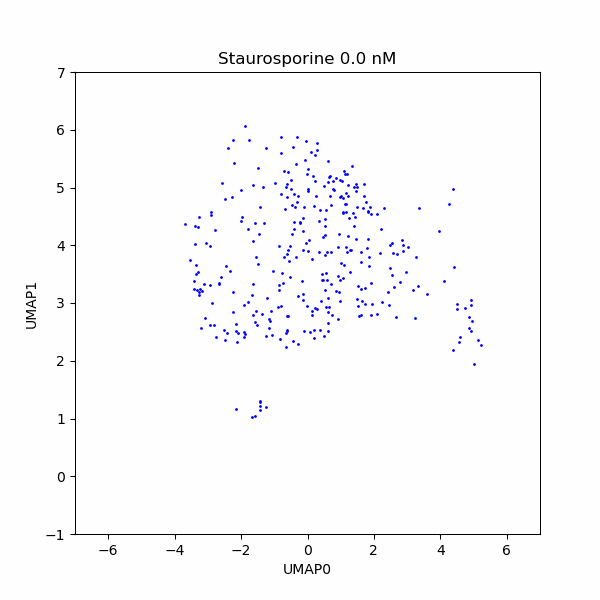

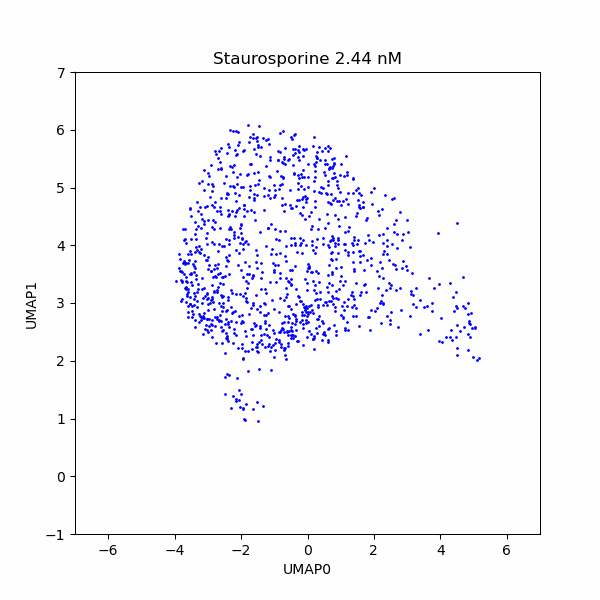

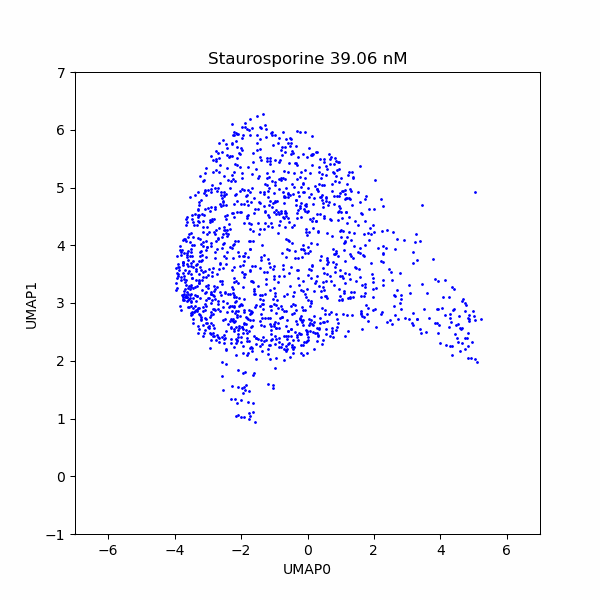

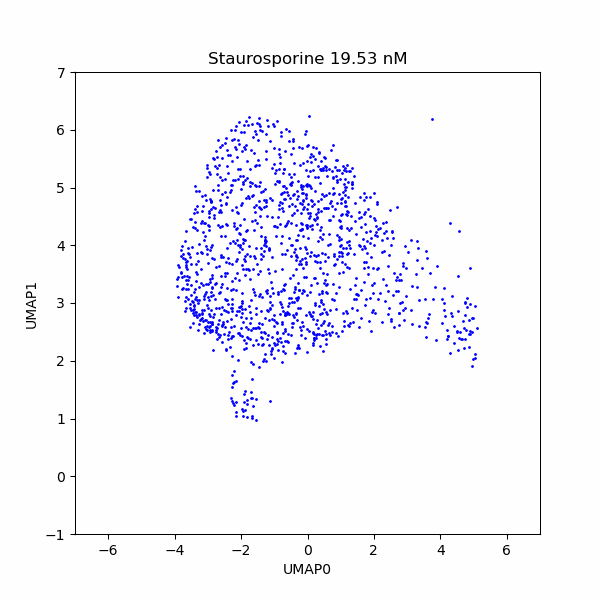

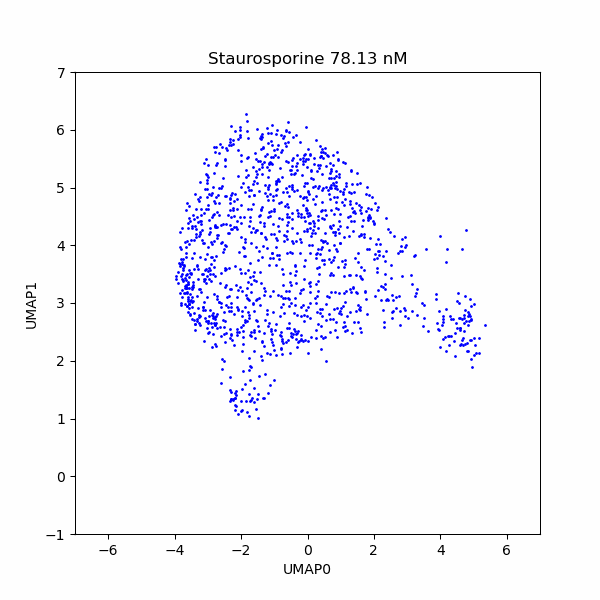

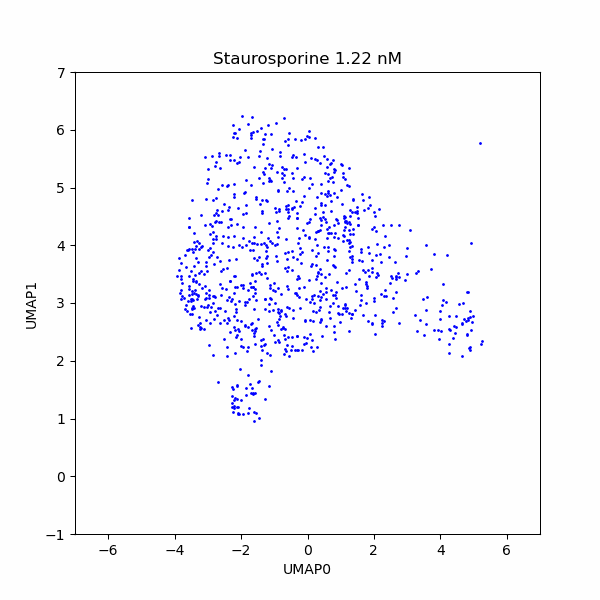

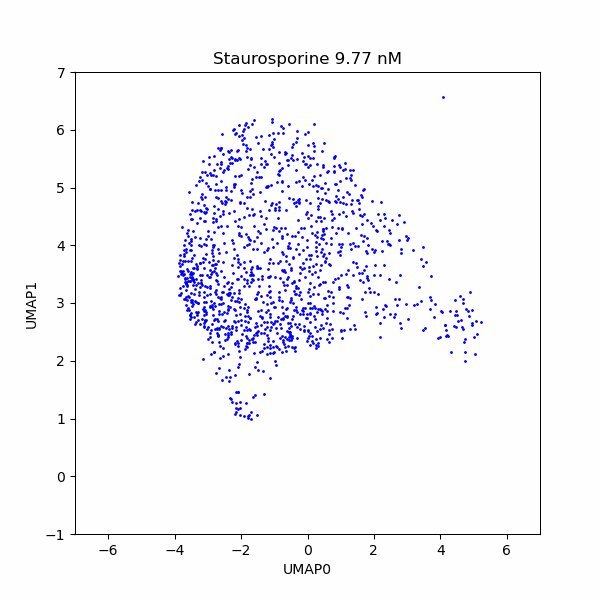

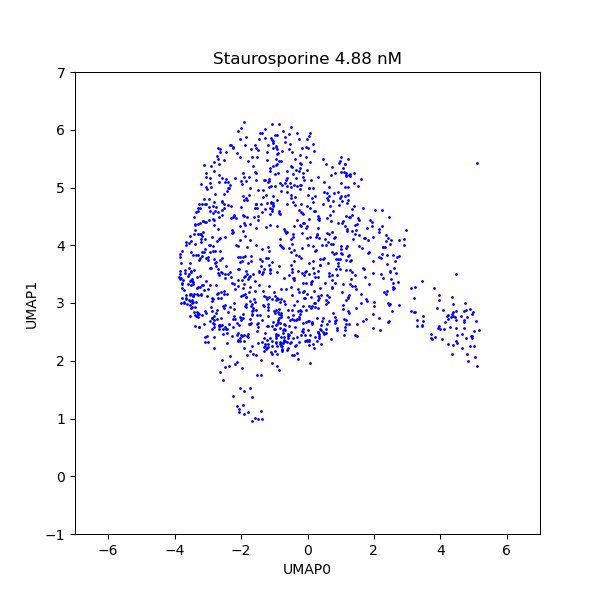

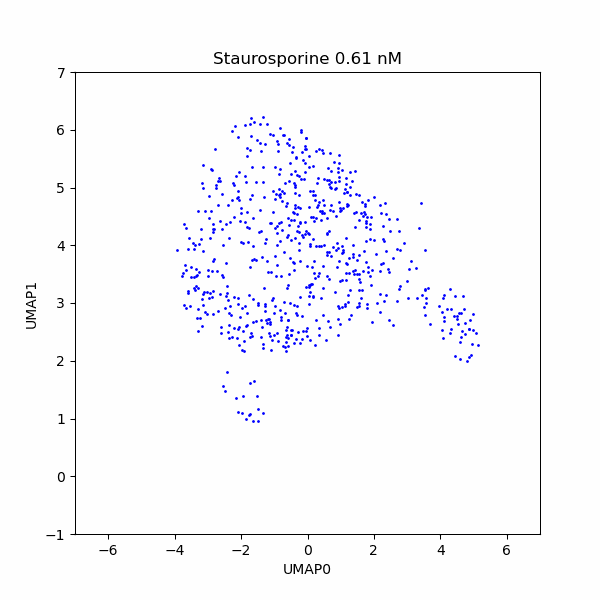

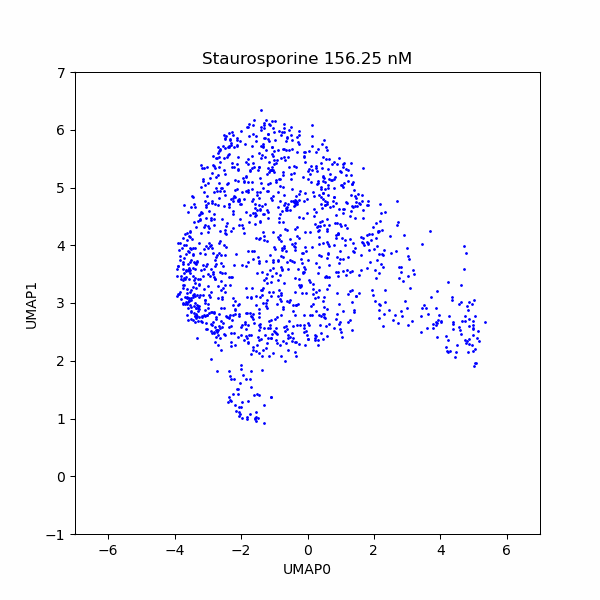

In [6]:
# Display the animations
for dose in unique_doses:
    with open(f"{output_path}/Staurosporine_{dose}nM.gif", "rb") as f:
        display(Image(f.read()))